In [1]:
# Imports
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

# Seaborn Options
sns.set_theme(style="ticks", color_codes=True)

In [2]:
# Police complaints

file_paths=glob.glob('data/police_complaints/*.csv')

concat_data = []
for file in file_paths:
    df = pd.read_csv(file, sep=',')
    df['Timestamp'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    concat_data.append(df)
df_final = pd.concat(concat_data)

filter = ['Facilities disturbances', 'Disturbing noises', 'Youth aggregation']
df_filtered = df_final.loc[df_final['Criminal sub-category'].isin(filter)]

df_filtered_san_salvario = df_filtered[df_filtered.District == 8]

df_filtered_san_salvario['Localization'] = df_filtered_san_salvario['Localization'].str.lower().str.strip()
df_filtered

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Criminal category,Criminal sub-category,District,Localization,Green Area,Date,Hour,Timestamp
60,Civil coexistence,Youth aggregation,10.0,PANETTI/MODESTO (VIA),Area Verde,14/06/2017,10.55,2017-06-14
61,Civil coexistence,Youth aggregation,6.0,VALPRATO/(VIA),NaN,15/06/2017,9.51,2017-06-15
62,Civil coexistence,Youth aggregation,3.0,ISONZO/(VIA),NaN,16/06/2017,8.37,2017-06-16
63,Civil coexistence,Youth aggregation,4.0,BARI/(VIA),Area Verde,22/06/2017,NaN,2017-06-22
508,Civil coexistence,Facilities disturbances,7.0,NIETZSCHE/FEDERICO (VIA),NaN,02/01/2017,NaN,2017-01-02
...,...,...,...,...,...,...,...,...
437,Civil coexistence,Disturbing noises,7.0,REGGIO/(VIA) ...,NaN,28/11/2019,NaN,2019-11-28
438,Civil coexistence,Disturbing noises,1.0,BERTOLA/ANTONIO GIUSEPPE (VIA) ...,NaN,28/11/2019,11.49,2019-11-28
439,Civil coexistence,Disturbing noises,3.0,SESTRIERE/(VIA) ...,NaN,06/12/2019,NaN,2019-12-06
440,Civil coexistence,Disturbing noises,4.0,GAMBA/ENRICO (CORSO) ...,NaN,13/12/2019,8.37,2019-12-13


In [3]:
localization_address_mapping = {
   'principe tommaso/(via)':  'Via Principe Tommaso, 18bis Torino',
   'baretti/giuseppe (via)': 'Via Principe Tommaso angolo via Baretti Torino',
   'marconi/guglielmo (corso)' : 'Corso Marconi, 27 Torino',
   'saluzzo/(largo)': 'Largo Saluzzo Torino',
   'saluzzo/(via)': 'Via Saluzzo, 26 Torino'
}

In [4]:
df_filtered_san_salvario['address'] = df_filtered_san_salvario['Localization'].map(localization_address_mapping)

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
df_filtered_san_salvario = df_filtered_san_salvario[~df_filtered_san_salvario.address.isna()]
df_filtered_san_salvario

,Criminal category,Criminal sub-category,District,Localization,Green Area,Date,Hour,Timestamp,address
689,Civil coexistence,Disturbing noises,8.0,baretti/giuseppe (via),NaN,19/06/2017,NaN,2017-06-19,Via Principe Tommaso angolo via Baretti Torino
549,Civil coexistence,Facilities disturbances,8.0,saluzzo/(largo),NaN,05/12/2016,NaN,2016-12-05,Largo Saluzzo Torino
550,Civil coexistence,Facilities disturbances,8.0,principe tommaso/(via),NaN,10/12/2016,NaN,2016-12-10,"Via Principe Tommaso, 18bis Torino"
609,Civil coexistence,Disturbing noises,8.0,principe tommaso/(via),NaN,19/09/2016,NaN,2016-09-19,"Via Principe Tommaso, 18bis Torino"
652,Civil coexistence,Disturbing noises,8.0,marconi/guglielmo (corso),NaN,19/12/2016,NaN,2016-12-19,"Corso Marconi, 27 Torino"
456,Civil coexistence,Facilities disturbances,8.0,saluzzo/(via),NaN,10/02/2016,NaN,2016-02-10,"Via Saluzzo, 26 Torino"
527,Civil coexistence,Facilities disturbances,8.0,principe tommaso/(via),NaN,17/06/2016,NaN,2016-06-17,"Via Principe Tommaso, 18bis Torino"
557,Civil coexistence,Disturbing noises,8.0,marconi/guglielmo (corso),NaN,24/02/2016,NaN,2016-02-24,"Corso Marconi, 27 Torino"
440,Civil coexistence,Facilities disturbances,8.0,principe tommaso/(via),NaN,01/02/2018,NaN,2018-02-01,"Via Principe Tommaso, 18bis Torino"
534,Civil coexistence,Facilities disturbances,8.0,marconi/guglielmo (corso),NaN,23/06/2018,NaN,2018-06-23,"Corso Marconi, 27 Torino"


In [6]:
df_filtered_san_salvario['Month'] = pd.DatetimeIndex(df_filtered_san_salvario['Timestamp']).month
df_filtered_san_salvario

,Criminal category,Criminal sub-category,District,Localization,Green Area,Date,Hour,Timestamp,address,Month
689,Civil coexistence,Disturbing noises,8.0,baretti/giuseppe (via),NaN,19/06/2017,NaN,2017-06-19,Via Principe Tommaso angolo via Baretti Torino,6
549,Civil coexistence,Facilities disturbances,8.0,saluzzo/(largo),NaN,05/12/2016,NaN,2016-12-05,Largo Saluzzo Torino,12
550,Civil coexistence,Facilities disturbances,8.0,principe tommaso/(via),NaN,10/12/2016,NaN,2016-12-10,"Via Principe Tommaso, 18bis Torino",12
609,Civil coexistence,Disturbing noises,8.0,principe tommaso/(via),NaN,19/09/2016,NaN,2016-09-19,"Via Principe Tommaso, 18bis Torino",9
652,Civil coexistence,Disturbing noises,8.0,marconi/guglielmo (corso),NaN,19/12/2016,NaN,2016-12-19,"Corso Marconi, 27 Torino",12
456,Civil coexistence,Facilities disturbances,8.0,saluzzo/(via),NaN,10/02/2016,NaN,2016-02-10,"Via Saluzzo, 26 Torino",2
527,Civil coexistence,Facilities disturbances,8.0,principe tommaso/(via),NaN,17/06/2016,NaN,2016-06-17,"Via Principe Tommaso, 18bis Torino",6
557,Civil coexistence,Disturbing noises,8.0,marconi/guglielmo (corso),NaN,24/02/2016,NaN,2016-02-24,"Corso Marconi, 27 Torino",2
440,Civil coexistence,Facilities disturbances,8.0,principe tommaso/(via),NaN,01/02/2018,NaN,2018-02-01,"Via Principe Tommaso, 18bis Torino",2
534,Civil coexistence,Facilities disturbances,8.0,marconi/guglielmo (corso),NaN,23/06/2018,NaN,2018-06-23,"Corso Marconi, 27 Torino",6


In [7]:
df_filtered_san_salvario['Number of Complaints'] = 1
df_grouped = df_filtered_san_salvario.groupby(['Localization', 'Month']).sum().reset_index()
df_grouped = df_grouped.copy()[["Localization", "Month", "Number of Complaints"]]
# print(df_grouped.sum())
df_grouped

,Localization,Month,Number of Complaints
0,baretti/giuseppe (via),5,2
1,baretti/giuseppe (via),6,1
2,baretti/giuseppe (via),7,1
3,baretti/giuseppe (via),10,1
4,marconi/guglielmo (corso),2,1
5,marconi/guglielmo (corso),6,1
6,marconi/guglielmo (corso),9,1
7,marconi/guglielmo (corso),12,1
8,principe tommaso/(via),2,1
9,principe tommaso/(via),6,1


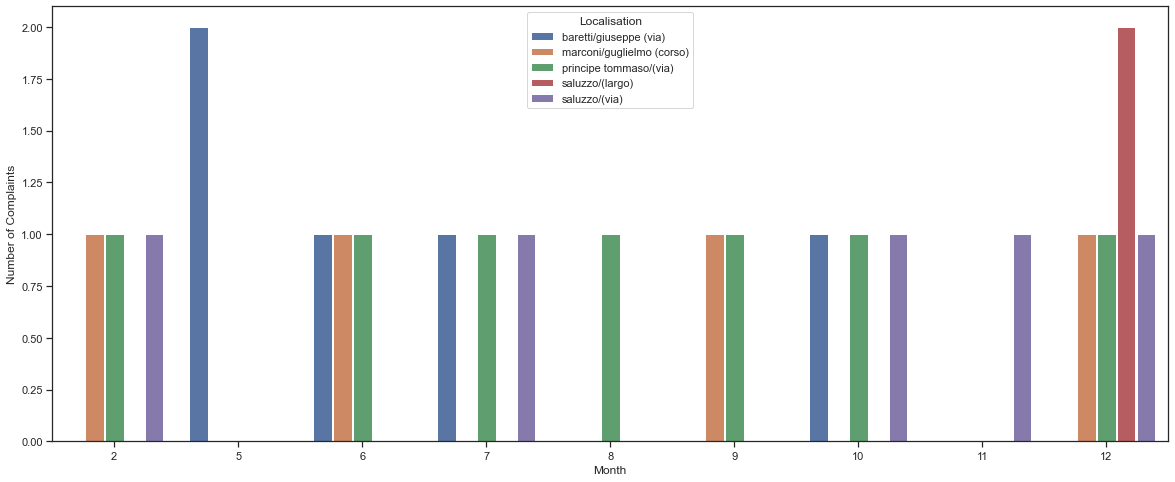

In [23]:
# Create some really nice plots
# Example
# titanic = sns.load_dataset("titanic")
# titanic
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

fig, ax = pylab.subplots(figsize=(20, 8))

sns.barplot(data=df_grouped, ax=ax, x="Month", y="Number of Complaints", hue="Localization")

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .15)
pylab.legend(loc='upper center', title="Localisation")
pylab.show()